In [1]:
import bose
from pm4py.objects.log.importer.xes import importer as xes_importer
import tkinter as tk
from tkinter import filedialog
import evaluation
import matplotlib.pyplot as plt
from pathlib import Path

## Choose an Event Log ##

In [2]:
root = tk.Tk()
root.withdraw()
root.lift()

file_path = filedialog.askopenfilename(filetypes=[("XES Event Log","*.xes")])
print(f"Chosen Log: {Path(file_path).stem}")
log = xes_importer.apply(file_path)

Chosen Log: Atomic_Size2_ConditionalToSequence


parsing log, completed traces ::   0%|          | 0/2999 [00:00<?, ?it/s]

### Parameters / Constants ###

In [3]:
WINDOW_SIZE = 200
MEASURE_WINDOW = None
TRUE_CHANGEPOINTS = [999,1999]

#### Extract Time Series and Apply Sliding Window ####

In [4]:
p_j = bose.detectChange_JMeasure_KS(log,WINDOW_SIZE, MEASURE_WINDOW)
p_wc = bose.detectChange_WC_KS(log,WINDOW_SIZE, MEASURE_WINDOW)

Calculating J P-Values for Bose, activity pairs complete ::   0%|          | 0/1764 [00:00<?, ?it/s]

Calculating WC P-Values for Bose, activity pairs complete ::   0%|          | 0/1764 [00:00<?, ?it/s]

### Visual Inspection ###

In [5]:
# "Trim" parameter removes the default constant ones from the sides to not influence visual inspection
cp_j = bose.visualInspection(p_j, WINDOW_SIZE)
cp_wc = bose.visualInspection(p_wc, WINDOW_SIZE)

print(f"J Measure Extraction detected {cp_j}.")
print(f"Window Count Extraction detected {cp_wc}.")

J Measure Extraction detected [962, 1951].
Window Count Extraction detected [897, 1919].


### Plotting ###

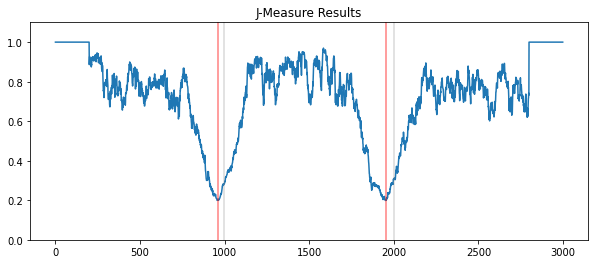

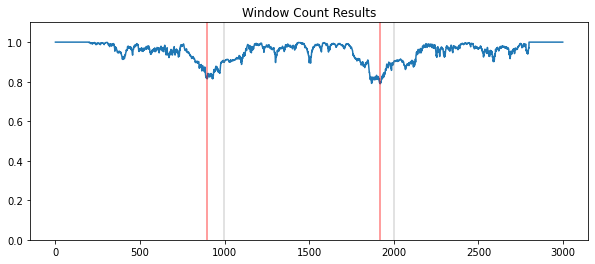

In [6]:
def plotPvals(sig, cp, known_cp, title):
    plt.rcParams['figure.figsize']=(10,4)
    plt.plot(sig)
    for c in cp:
        plt.axvline(x=c, color="red", alpha=0.5)
    for c in known_cp:
        plt.axvline(x=c, color="grey", alpha=0.3)
    plt.ylim(0,1.1)
    plt.title(title)
    plt.show()

plotPvals(p_j,cp_j,TRUE_CHANGEPOINTS, "J-Measure Results")
plotPvals(p_wc,cp_wc,TRUE_CHANGEPOINTS, "Window Count Results")

### Evaluation ###

In [7]:
f1_j = evaluation.F1_Score(lag=200, detected=cp_j, known=[999,1999])
f1_wc = evaluation.F1_Score(lag=200, detected=cp_wc, known=[999,1999])

print(f"J Measure Extraction detected {cp_j} with an F1-Score of {f1_j}.")
print(f"Window Count Extraction detected {cp_wc} with an F1-Score of {f1_wc}.")

J Measure Extraction detected [962, 1951] with an F1-Score of 1.0.
Window Count Extraction detected [897, 1919] with an F1-Score of 1.0.
